# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cia_factbook.csv')
print(data.columns)

Index(['country', 'area', 'birth_rate', 'death_rate', 'infant_mortality_rate',
       'internet_users', 'life_exp_at_birth', 'maternal_mortality_rate',
       'net_migration_rate', 'population', 'population_growth_rate'],
      dtype='object')


## 1. Perform Exploratory Data Analysis

In [35]:
df = pd.read_csv("cia_factbook.csv")

In [36]:
print(df.head())

         country        area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  17098242.0       11.87       13.83                   7.08   
1         Canada   9984670.0       10.29        8.31                   4.71   
2  United States   9826675.0       13.42        8.15                   6.17   
3          China   9596960.0       12.17        7.44                  14.79   
4         Brazil   8514877.0       14.72        6.54                  19.21   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0      40853000.0              70.16                     34.0   
1      26960000.0              81.67                     12.0   
2     245000000.0              79.56                     21.0   
3     389000000.0              75.15                     37.0   
4      75982000.0              73.28                     56.0   

   net_migration_rate    population  population_growth_rate  
0                1.69  1.424703e+08                   -0.03  
1         

In [37]:
print(df.describe())

               area  birth_rate  death_rate  infant_mortality_rate  \
count  2.570000e+02  224.000000  225.000000             224.000000   
mean   5.308881e+05   19.659063    7.906978              24.484420   
std    1.696869e+06    9.669575    2.979933              24.077809   
min    0.000000e+00    6.720000    1.530000               1.810000   
25%    6.160000e+02   11.840000    5.930000               6.185000   
50%    5.119700e+04   16.890000    7.630000              13.985000   
75%    3.381450e+05   24.915000    9.450000              38.655000   
max    1.709824e+07   46.120000   17.490000             117.230000   

       internet_users  life_exp_at_birth  maternal_mortality_rate  \
count    2.130000e+02         224.000000               184.000000   
mean     8.311771e+06          71.826875               177.972826   
std      3.350725e+07           8.798460               262.508297   
min      4.640000e+02          49.440000                 2.000000   
25%      8.640000e+04   

In [38]:
print(df.isnull().sum())

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64


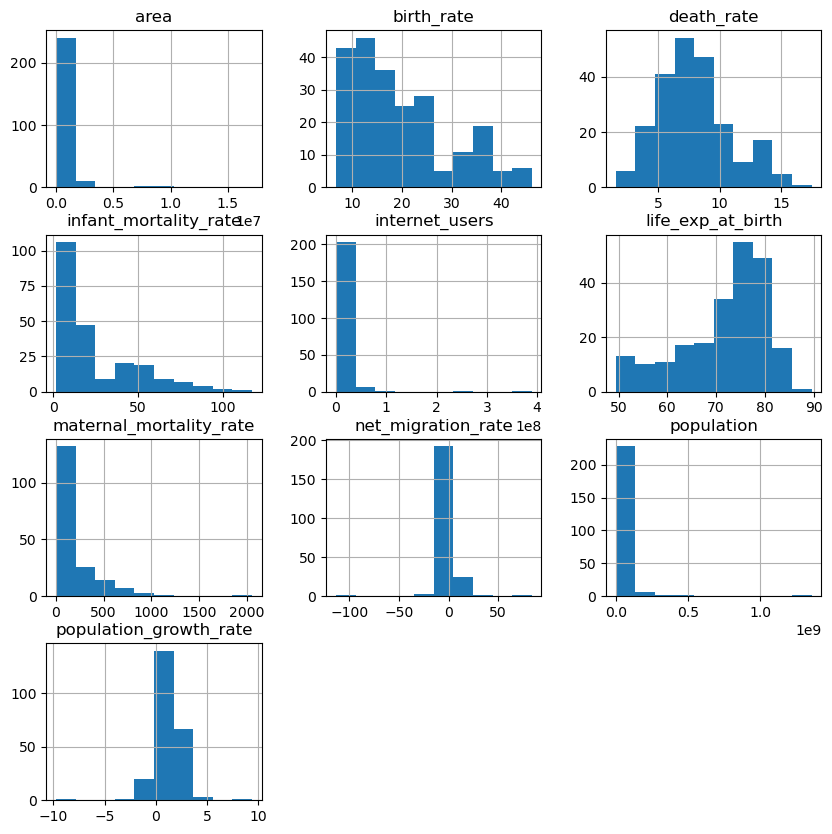

In [39]:
df.hist(figsize=(10, 10))
plt.show()

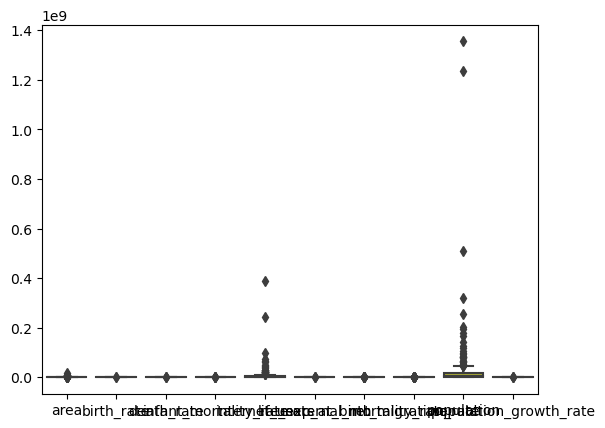

In [40]:
sns.boxplot(data=df)
plt.show()

C:\Users\Ralph\AppData\Local\Temp\ipykernel_10776\439454894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


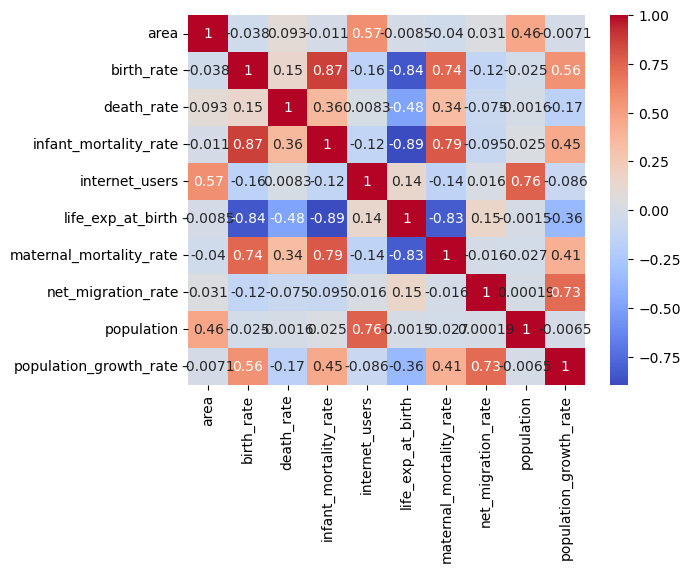

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

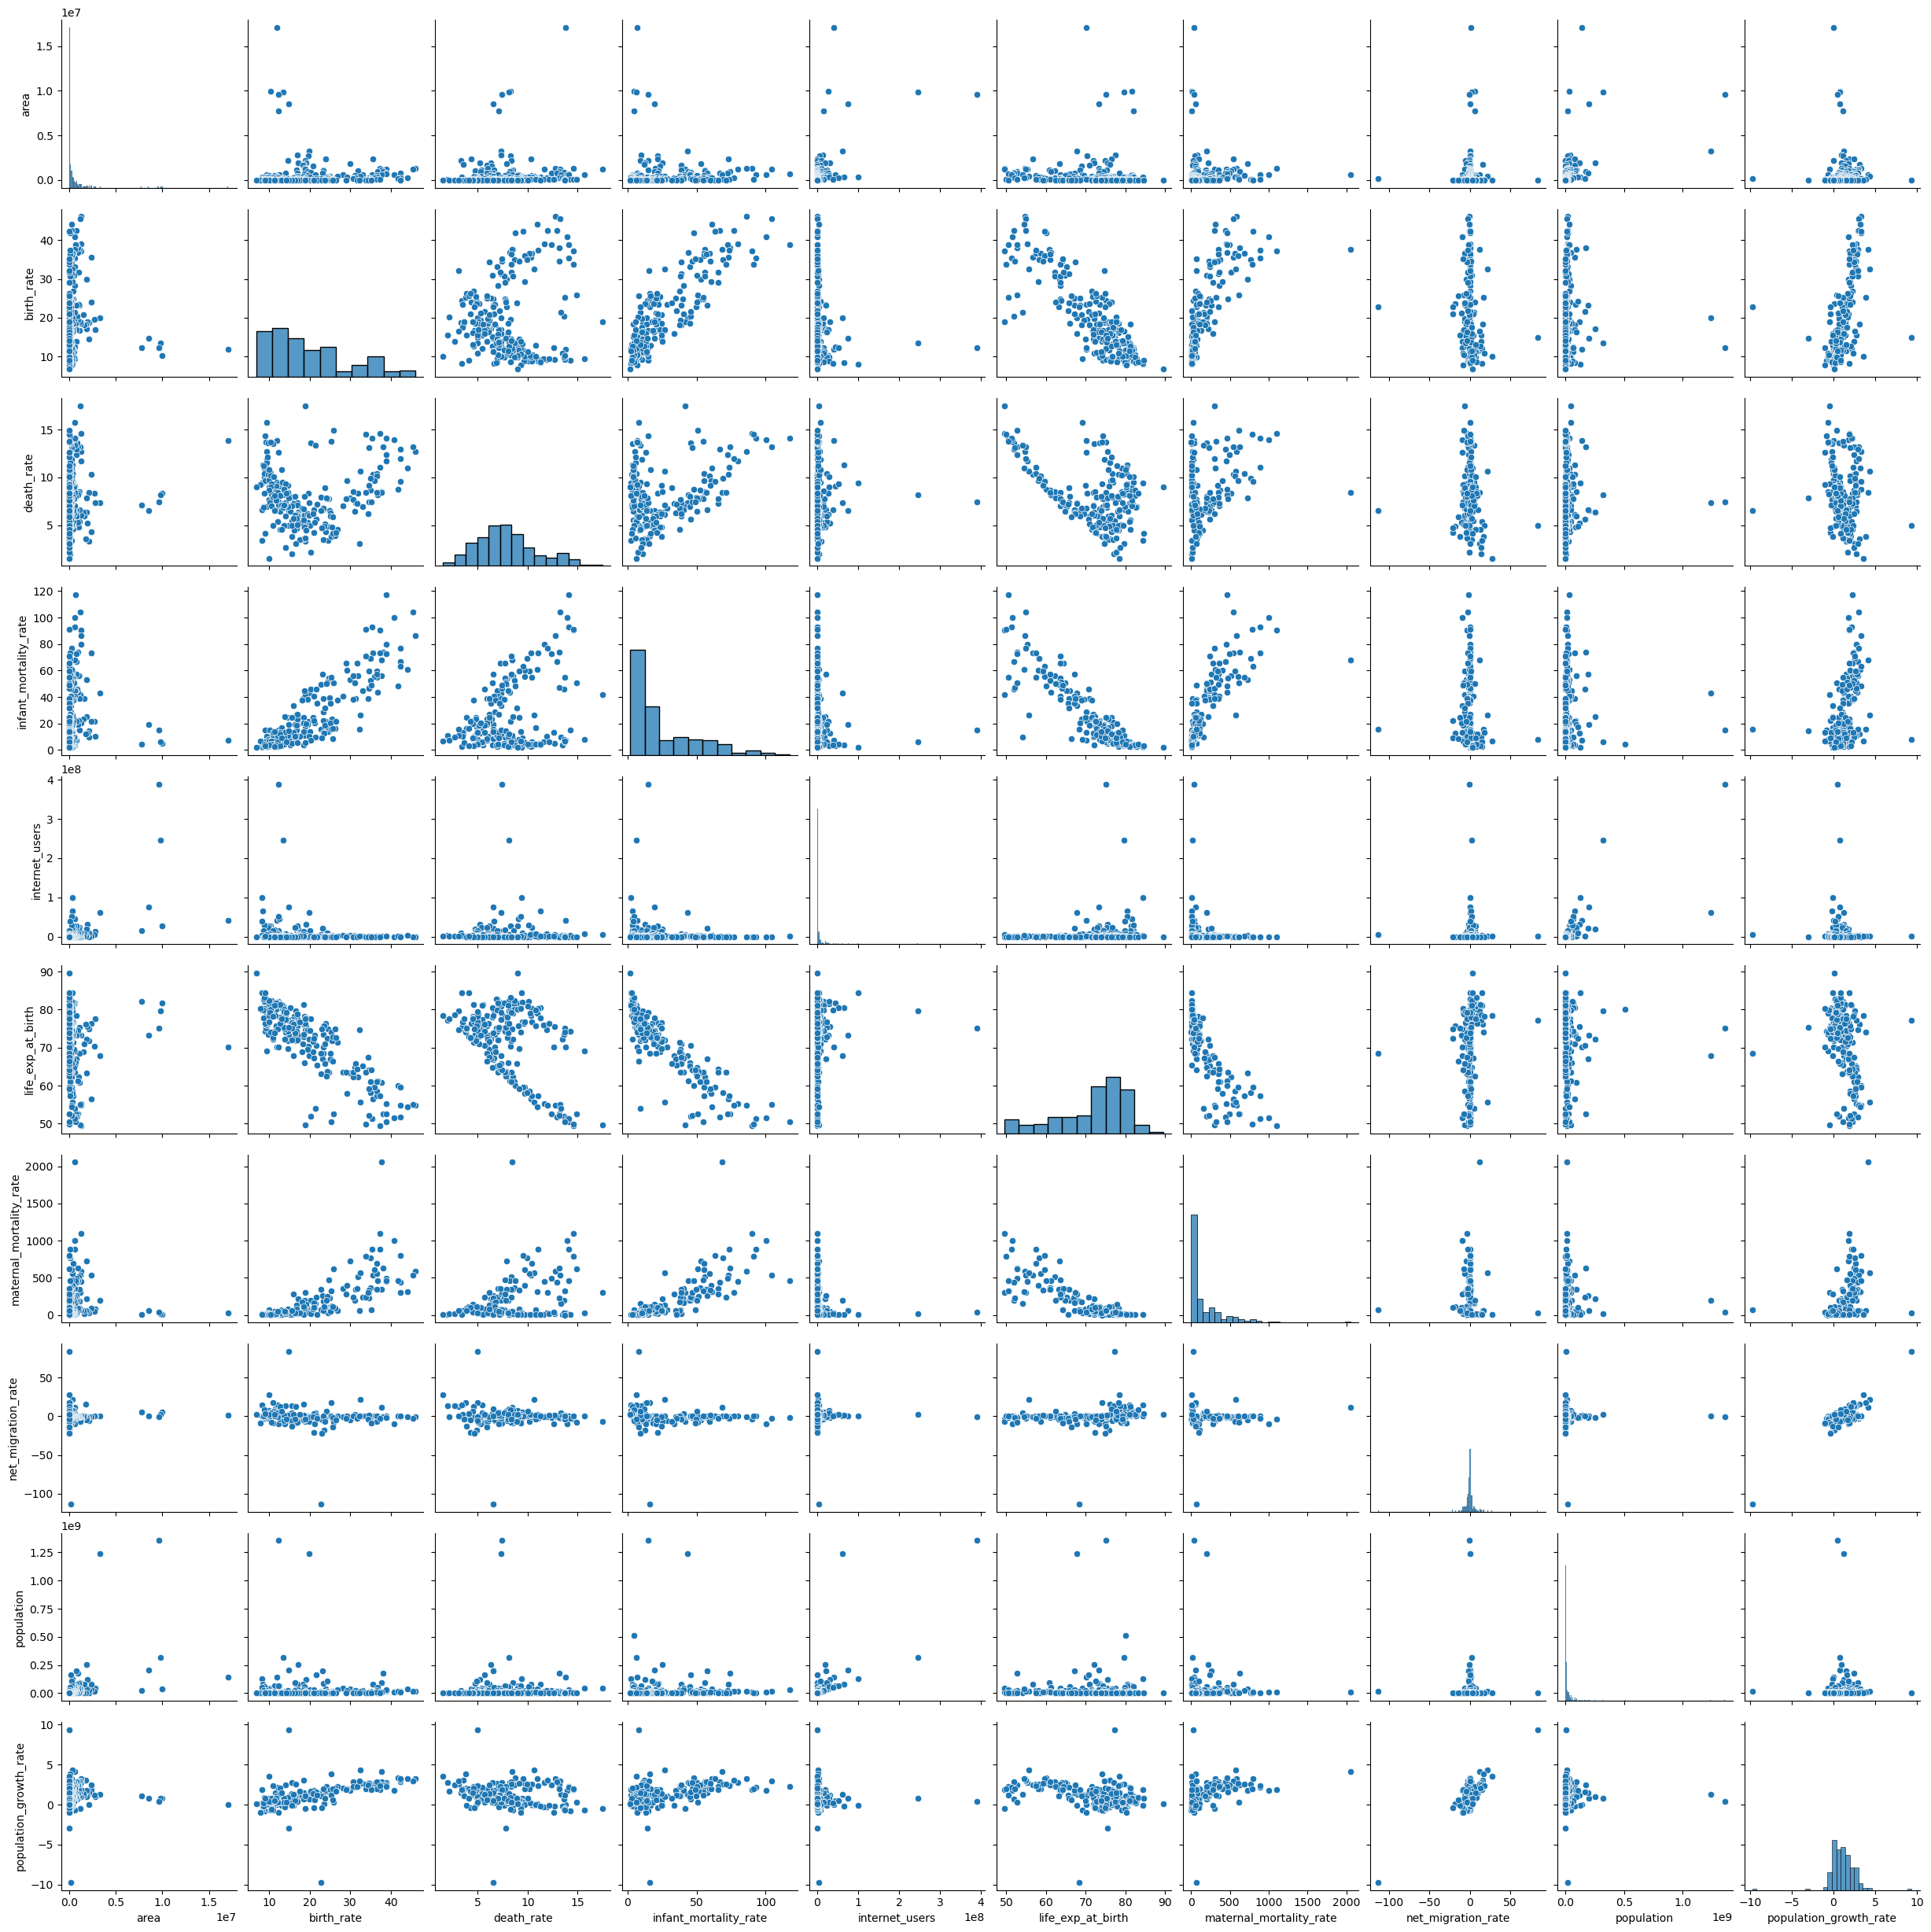

In [42]:
sns.pairplot(df)
plt.show()

In [43]:
grouped = df.groupby('country').mean()

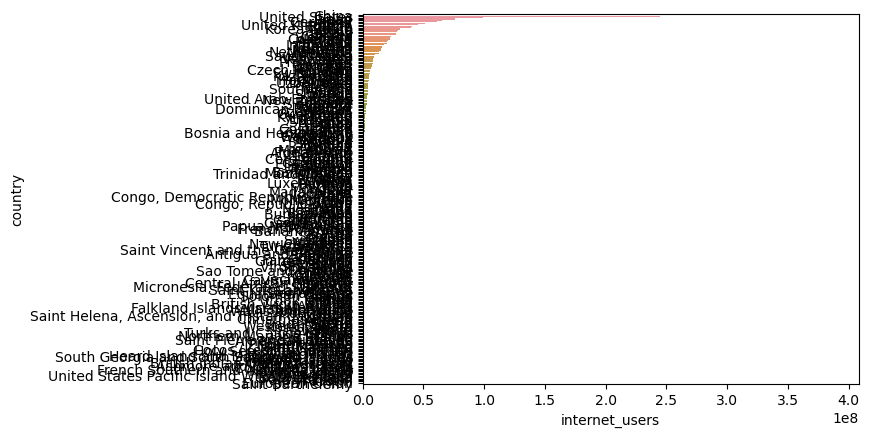

In [44]:
sns.barplot(x='internet_users', y='country', data=df.sort_values('internet_users', ascending=False))
plt.show()

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


**TASK:Use the same method for the missing values in Literacy.**

In [48]:
# Task 1: Find countries with NaN values in any column and their main aspect
nan_countries = df[df.isnull().any(axis=1)]['country']
main_aspects = df[df.isnull().any(axis=1)].drop(columns=['country']).idxmax(axis=1)
countries_and_aspects = pd.DataFrame({'Country': nan_countries, 'Main Aspect': main_aspects})
print("Countries with NaN values in any column and their main aspect:")
print(countries_and_aspects)

Countries with NaN values in any column and their main aspect:
              Country Main Aspect
9             Algeria  population
11          Greenland        area
22             Angola  population
31            Nigeria  population
41        South Sudan  population
..                ...         ...
254     Bouvet Island        area
255     Palmyra Atoll        area
256          Akrotiri        area
257    European Union  population
258  Saint Barthelemy  population

[82 rows x 2 columns]


In [52]:
from sklearn.impute import SimpleImputer

# Impute missing values across all numerical columns
imputer = SimpleImputer(strategy='mean')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

df.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


In [53]:
df.isnull().sum()

country                    0
area                       0
birth_rate                 0
death_rate                 0
infant_mortality_rate      0
internet_users             0
life_exp_at_birth          0
maternal_mortality_rate    0
net_migration_rate         0
population                 0
population_growth_rate     0
dtype: int64

# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

**TASK: For numerical data perform standard scaler.**

In [66]:
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,country_Venezuela,country_Vietnam,country_Virgin Islands,country_Wake Island,country_Wallis and Futuna,country_West Bank,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,9.820524,-8.681109e-01,2.137287e+00,-7.790046e-01,1.073438e+00,-2.041709e-01,-6.524719e-01,1.818325e-01,0.901918,-8.422556e-01,...,0,0,0,0,0,0,0,0,0,0
1,5.603858,-1.044206e+00,1.454281e-01,-8.850835e-01,6.151497e-01,1.205657e+00,-7.521740e-01,5.675369e-01,0.020797,-2.538690e-01,...,0,0,0,0,0,0,0,0,0,0
2,5.510204,-6.953595e-01,8.769309e-02,-8.197353e-01,7.807642e+00,9.472090e-01,-7.113868e-01,2.556701e-01,2.346136,-2.464211e-01,...,0,0,0,0,0,0,0,0,0,0
3,5.374037,-8.346752e-01,-1.685061e-01,-4.339126e-01,1.255777e+01,4.070403e-01,-6.388762e-01,-1.344849e-02,10.833553,-4.922028e-01,...,0,0,0,0,0,0,0,0,0,0
4,4.732618,-5.504712e-01,-4.932656e-01,-2.360778e-01,2.232240e+00,1.779892e-01,-5.527699e-01,3.067814e-03,1.394615,-2.240773e-01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.314662,-1.152329e-17,-6.148432e-18,-1.382794e-17,-3.266621e-18,-1.843726e-17,-3.316766e-18,6.173374e-19,0.000000,4.034501e-18,...,0,0,0,0,0,0,0,0,0,0
255,-0.314684,-1.152329e-17,-6.148432e-18,-1.382794e-17,-3.266621e-18,-1.843726e-17,-3.316766e-18,6.173374e-19,0.000000,4.034501e-18,...,0,0,0,0,0,0,0,0,0,0
256,-0.314618,-1.152329e-17,-6.148432e-18,-1.382794e-17,-3.266621e-18,-1.843726e-17,-3.316766e-18,6.173374e-19,0.000000,4.034501e-18,...,0,0,0,0,0,0,0,0,0,0
257,0.000000,-1.152329e-17,-6.148432e-18,-9.020919e-01,-3.266621e-18,1.003553e+00,-3.316766e-18,6.173374e-19,3.922322,4.034501e-18,...,0,0,0,0,0,0,0,0,0,0


# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


fig = px.line(x=range(1, 11), y=wcss)
fig.update_layout(
    xaxis_title='Number of Clusters',
    yaxis_title='WCSS',
    title={
        'text': 'Elbow Method for Optimal k',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 2 The average silhouette_score is : 0.38061391163422786


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 3 The average silhouette_score is : 0.3986704558949404


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 4 The average silhouette_score is : 0.20821494431323984


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 5 The average silhouette_score is : 0.20257159668946512


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 6 The average silhouette_score is : 0.20184397865728168


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 7 The average silhouette_score is : 0.19593337323670204


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 8 The average silhouette_score is : 0.19702616455320465


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 9 The average silhouette_score is : 0.20208622724843744


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



For n_clusters = 10 The average silhouette_score is : 0.1717996087904378
The optimal number of clusters is: 3


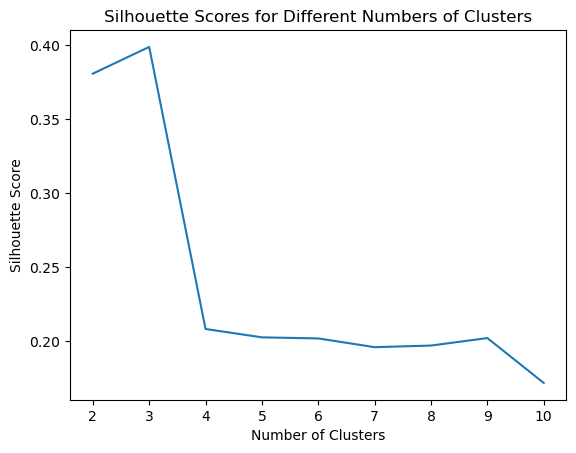

In [71]:
range_n_clusters = list(range(2, 11))
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("The optimal number of clusters is:", optimal_clusters)

plt.plot(range_n_clusters, silhouette_scores)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [73]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

             area  birth_rate  death_rate  infant_mortality_rate  \
Cluster                                                            
0       -0.018424    1.556374    0.823948               1.606319   
1        4.172707   -0.501432   -0.093932              -0.138802   
2       -0.057046   -0.408613   -0.218868              -0.427351   

         internet_users  life_exp_at_birth  maternal_mortality_rate  \
Cluster                                                               
0             -0.215599          -1.611375                 1.368926   
1              7.371531           0.287003                -0.416813   
2             -0.051843           0.426501                -0.359760   

         net_migration_rate  population  population_growth_rate  ...  \
Cluster                                                          ...   
0                 -0.044091   -0.077231                0.887458  ...   
1                  0.085002    7.678747               -0.209181  ...   
2              

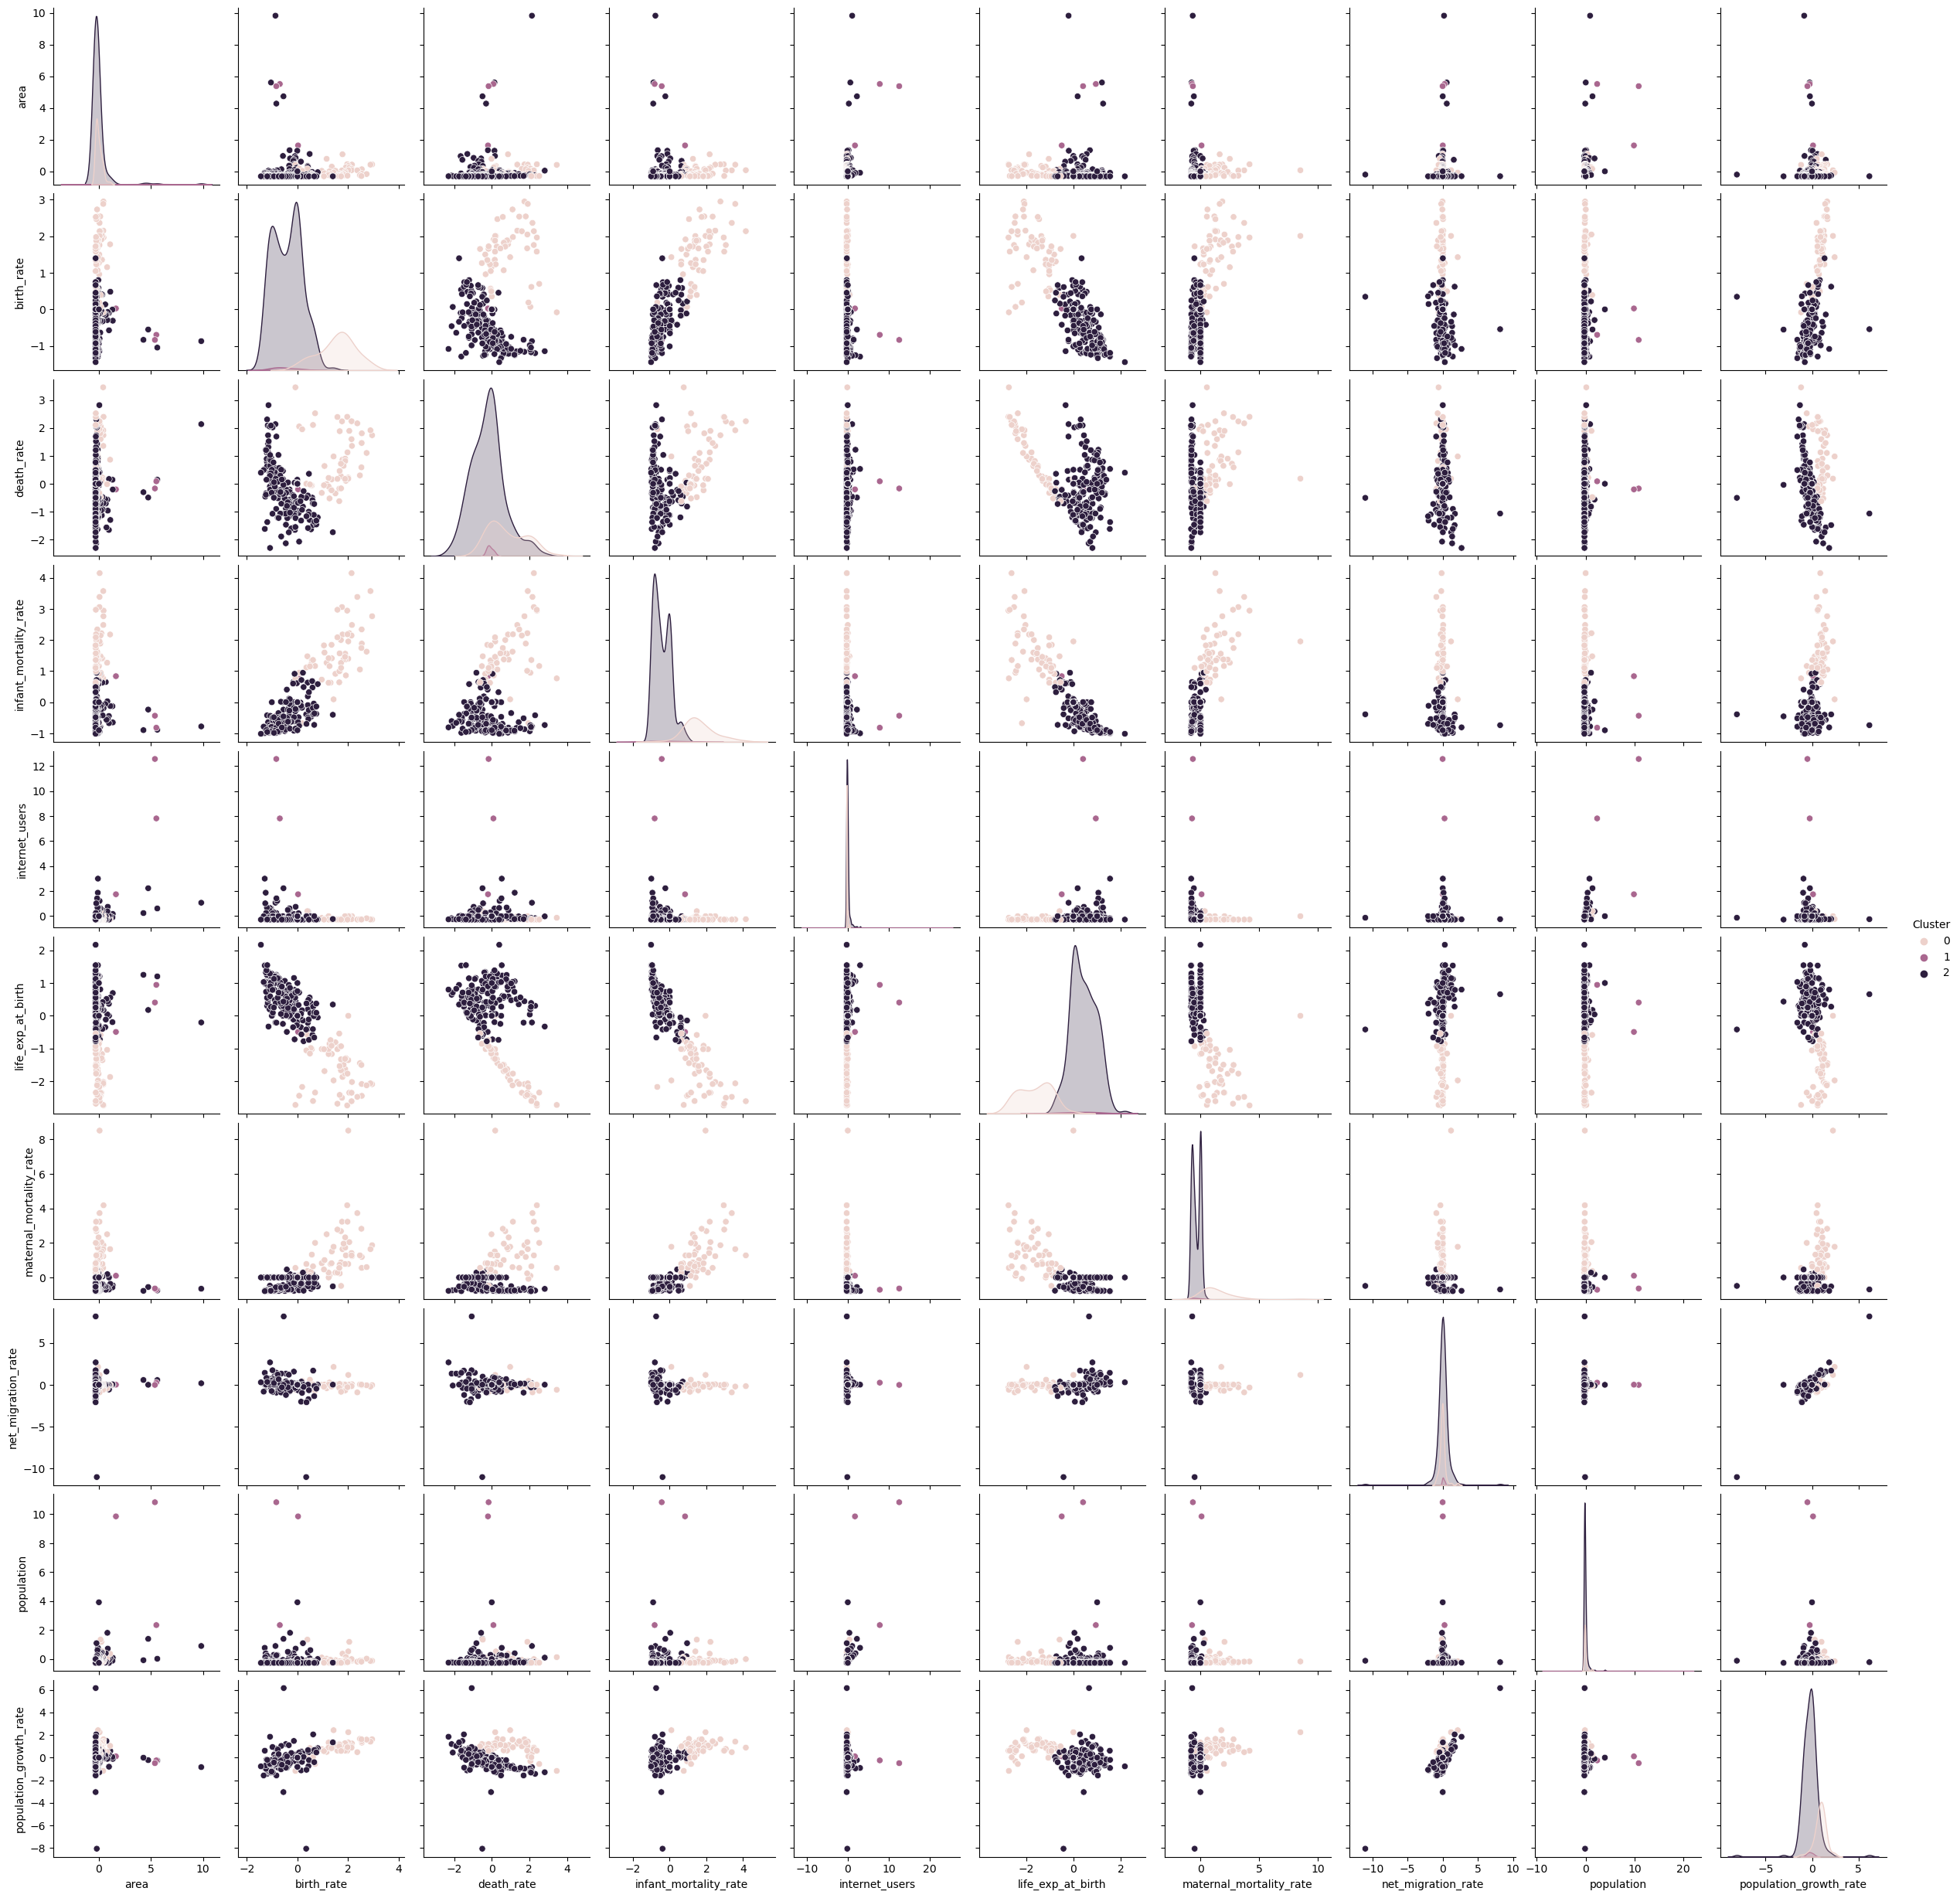

In [75]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

sns.pairplot(df, hue='Cluster', vars=numerical_cols)
plt.show()

The analysis suggests 3 is the ideal number of clusters. This is because data points within each of the 3 clusters are very similar, while being distinct from points in other clusters. This creates a clear and simple grouping, avoiding the complexity that might arise with more clusters. The significant drop in silhouette score for 4 or more clusters reinforces this point. Key features for cluster formation likely involve the most variation across the data, since these variations best differentiate the groups.

---